In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os

sys.path.append(os.path.abspath("../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import obtener_filas_no_fechas

ruta_archivo = "../data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
columna = 'nombre_columna'
titulo = 'titulo'
#Copiado del ultimo examen. Es para tener definidas las variables desde aqui.
columnas_numericas =['is_canceled','lead_time',
'arrival_date_year',
'arrival_date_week_number',
'arrival_date_day_of_month',
'stays_in_weekend_nights',
'stays_in_week_nights',
'adults',
'children',
'babies',
'is_repeated_guest',
'previous_cancellations',
'previous_bookings_not_canceled',
'booking_changes',
'days_in_waiting_list',
'adr',
'required_car_parking_spaces',
'total_of_special_requests']

columnas_no_numericas = ['arrival_date_month',
'meal',
'market_segment',
'distribution_channel',
'reserved_room_type',
'assigned_room_type',
'deposit_type',
'customer_type',
'reservation_status',
'reservation_status_date']

def vBox():
  sns.boxplot(x=df[columna])
  plt.title(titulo)
  plt.show()

#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
df = cargar_datos_pd(ruta_archivo)

def vr():
  print(ver_resumen_nulos(df))

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Crear una copia del DataFrame
df_copy = df.copy()


In [5]:

# Confirmado, no hay duplicados. Hombre de poca fe ...(Número de registros duplicados: 0)
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'customerID': 'string',
    'gender': 'category',
    'SeniorCitizen': 'int64',
    'Partner': 'category',
    'Dependents': 'category',
    'tenure': 'int64',
    'PhoneService': 'category',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'category',
    'PaymentMethod': 'category',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64',
    'Churn': 'category'
}

In [6]:
#Orgullosamente copiado del profe IL
# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'category': 'category',
        'float64': 'float64',
        'int64':'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'customerID': 'string', 'gender': 'category', 'SeniorCitizen': 'float64', 'Partner': 'category', 'Dependents': 'category', 'tenure': 'float64', 'PhoneService': 'category', 'MultipleLines': 'category', 'InternetService': 'category', 'OnlineSecurity': 'category', 'OnlineBackup': 'category', 'DeviceProtection': 'category', 'TechSupport': 'category', 'StreamingTV': 'category', 'StreamingMovies': 'category', 'Contract': 'category', 'PaperlessBilling': 'category', 'PaymentMethod': 'category', 'MonthlyCharges': 'float64', 'TotalCharges': 'float64', 'Churn': 'category'}


In [7]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df[df['customerID']=='7590-VHVEG']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [9]:
#Orgullosamente copiado del profe IL
# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'category': 'category',
        'float64': 'float64',
        'int64':'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'customerID': 'string', 'gender': 'category', 'SeniorCitizen': 'float64', 'Partner': 'category', 'Dependents': 'category', 'tenure': 'float64', 'PhoneService': 'category', 'MultipleLines': 'category', 'InternetService': 'category', 'OnlineSecurity': 'category', 'OnlineBackup': 'category', 'DeviceProtection': 'category', 'TechSupport': 'category', 'StreamingTV': 'category', 'StreamingMovies': 'category', 'Contract': 'category', 'PaperlessBilling': 'category', 'PaymentMethod': 'category', 'MonthlyCharges': 'float64', 'TotalCharges': 'float64', 'Churn': 'category'}


In [10]:
#Orgullosamente copiado del profe IL
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            # Por ejemplo, 'string' en pandas puede ser 'string[python]'
            # Comparar solo las partes relevantes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'customerID': Tipo actual -> object, Tipo esperado -> string
- Columna 'gender': Tipo actual -> object, Tipo esperado -> category
- Columna 'SeniorCitizen': Tipo actual -> int64, Tipo esperado -> float64
- Columna 'Partner': Tipo actual -> object, Tipo esperado -> category
- Columna 'Dependents': Tipo actual -> object, Tipo esperado -> category
- Columna 'tenure': Tipo actual -> int64, Tipo esperado -> float64
- Columna 'PhoneService': Tipo actual -> object, Tipo esperado -> category
- Columna 'MultipleLines': Tipo actual -> object, Tipo esperado -> category
- Columna 'InternetService': Tipo actual -> object, Tipo esperado -> category
- Columna 'OnlineSecurity': Tipo actual -> object, Tipo esperado -> category
- Columna 'OnlineBackup': Tipo actual -> object, Tipo esperado -> category
- Columna 'DeviceProtection': Tipo actual -> object, Tipo esperado -> category
- Columna 'TechSupport': Tipo actual -> object, Tipo esperado -> ca

In [11]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Error al convertir la columna 'TotalCharges' a 'float64': could not convert string to float: ' '
Aún existen discrepancias después de la corrección:
- Columna 'TotalCharges': Tipo actual -> object, Tipo esperado -> float64


In [12]:
#Orgullosamente copiado del profe IL
# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'TotalCharges': Tipo actual -> object, Tipo esperado -> float64


In [20]:
df_tt = df[~df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]

In [21]:
df_tt['TotalCharges'].value_counts()

TotalCharges
    11
Name: count, dtype: int64

In [29]:
df_tt

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [26]:
df[['customerID','SeniorCitizen','tenure','PaymentMethod','MonthlyCharges','TotalCharges']].head()

,customerID,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0.0,1.0,Electronic check,29.85,29.85
1,5575-GNVDE,0.0,34.0,Mailed check,56.95,1889.5
2,3668-QPYBK,0.0,2.0,Mailed check,53.85,108.15
3,7795-CFOCW,0.0,45.0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,0.0,2.0,Electronic check,70.70,151.65


In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df_tt


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0.0,No,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0.0,Yes,Yes,0.0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0.0,Yes,Yes,0.0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0.0,Yes,Yes,0.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0.0,Yes,Yes,0.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0.0,Yes,Yes,0.0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


No tienen el dato tenure, tengo que calcularlos tambien para luego ver en que casos es una multiplicacion directa y en que casos no

Me encantaria tomarme el tiempo para hacer la inputacion de estos 11 registros pero no tengo tiempo. Hay casos en que son mas que el producto de tenure y MonthlyCharges o a veces menos.

Son solo 11 registros contra 7.043. representan el 0.002 %

Sorry los elimino

In [30]:
df['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [31]:
df_copy['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [32]:
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]

In [33]:
df['SeniorCitizen'].describe()

count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [34]:
#Orgullosamente copiado del profe IL
# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'TotalCharges': Tipo actual -> object, Tipo esperado -> float64


In [35]:
#Orgullosamente copiado del profe IL
# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos han sido corregidos correctamente.


C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\2091562998.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].astype(tipo)
C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\2091562998.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = df[columna].astype(tipo)
C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\2091562998.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [36]:
#Orgullosamente copiado del profe IL
# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   string  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   float64 
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   float64 
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 non-nu

In [38]:
#Orgullosamente copiado del profe IL
import json
# Lista de columnas categóricas a revisar
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/kaggle/telcoms/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'gender':
['Female', 'Male']

Valores únicos en la columna 'Partner':
['Yes', 'No']

Valores únicos en la columna 'Dependents':
['No', 'Yes']

Valores únicos en la columna 'PhoneService':
['No', 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service', 'No', 'Yes']

Valores únicos en la columna 'InternetService':
['DSL', 'Fiber optic', 'No']

Valores únicos en la columna 'OnlineSecurity':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes', 'No', 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'TechSupport':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingTV':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'Contract':
['Month-to-month', 'One year', 'Two year']

Valores únicos en 

In [40]:
#Orgullosamente copiado del profe IL
import re
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())


Valores únicos después de limpieza en 'gender':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'Partner':
['yes', 'no']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'Dependents':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'PhoneService':
['no', 'yes']
Categories (2, object): ['no', 'yes']

Valores únicos después de limpieza en 'MultipleLines':
['no phone service', 'no', 'yes']
Categories (3, object): ['no', 'no phone service', 'yes']

Valores únicos después de limpieza en 'InternetService':
['dsl', 'fiber optic', 'no']
Categories (3, object): ['dsl', 'fiber optic', 'no']

Valores únicos después de limpieza en 'OnlineSecurity':
['no', 'yes', 'no internet service']
Categories (3, object): ['no', 'no internet service', 'yes']

Valores únicos después de limpieza en 'OnlineBackup':
['yes', 'no', 'no internet service']
Categories (3, object): ['no', 'no inter

C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3099267159.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(limpiar_cadena)
C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3099267159.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(limpiar_cadena)
C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3099267159.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [42]:
#Orgullosamente copiado del profe IL
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/kaggle/telcoms/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


### **Manejo de valores faltantes**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [43]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
customerID,7032,0,0.0
gender,7032,0,0.0
SeniorCitizen,7032,0,0.0
Partner,7032,0,0.0
Dependents,7032,0,0.0
tenure,7032,0,0.0
PhoneService,7032,0,0.0
MultipleLines,7032,0,0.0
InternetService,7032,0,0.0
OnlineSecurity,7032,0,0.0


# Que felicidad es ver esto! NO hay nulos ni datos faltantes

C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3236145055.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['MonthlyCharges'], label='Original', shade=True)
C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3236145055.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_copy['MonthlyCharges'], label='Imputado', shade=True)


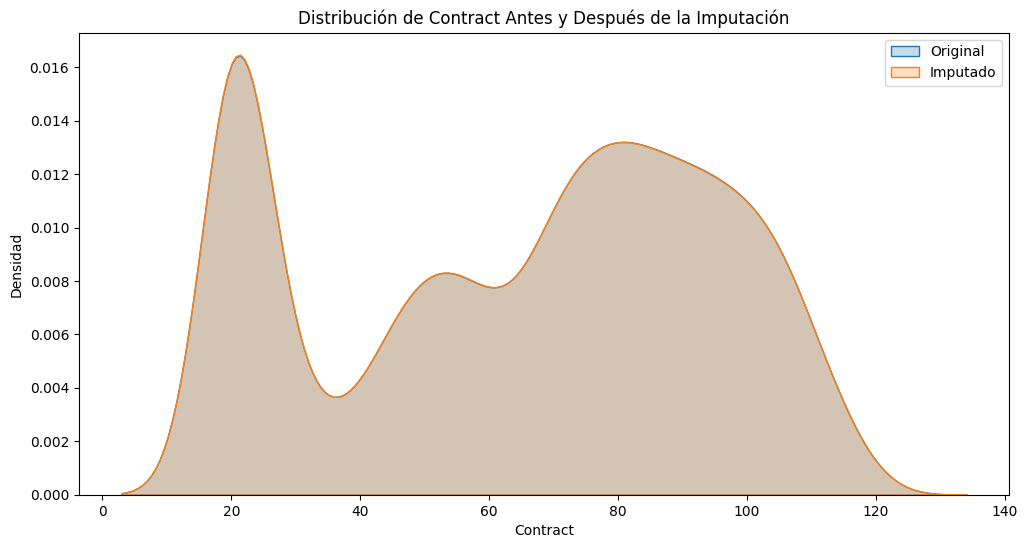

In [46]:
#Orgullosamente copiado del profe.
# Espero haber entendido como funciona pero hice una comparacion con la copia y con df con los 11 registros eliminados. No veo diferencia.
import seaborn as sns
import matplotlib.pyplot as plt
# Comparar la distribución de 'critic_score' antes y después de la imputación
plt.figure(figsize=(12, 6))
sns.kdeplot(df['MonthlyCharges'], label='Original', shade=True)
sns.kdeplot(df_copy['MonthlyCharges'], label='Imputado', shade=True)
plt.title('Distribución de Contract Antes y Después de la Imputación')
plt.xlabel('Contract')
plt.ylabel('Densidad')
plt.legend()
plt.show()

En la grafica de arriba no veo ni noto alguna influencia de haber eliminado los 11 registros.

### Detección de datos anómalos

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

In [48]:
# Identificar filas con ventas negativas
sales_columns = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
negative_sales = df[sales_columns] < 0
num_negative_sales = negative_sales.sum().sum()
print(f"Número total de ventas negativas: {num_negative_sales}")

Número total de ventas negativas: 0


In [ ]:
# No tiene puntuaciones o encuestas de satisfaccion de clientes! Se debe tener siempre eso.
# Tampoco hay fechas.

## Exploración de datos con Python

### Visualizaciones exploratorias univariadas

C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\540464244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tenure', y='Churn', data=df_box_genero_contrato_s_n, palette='Set2')


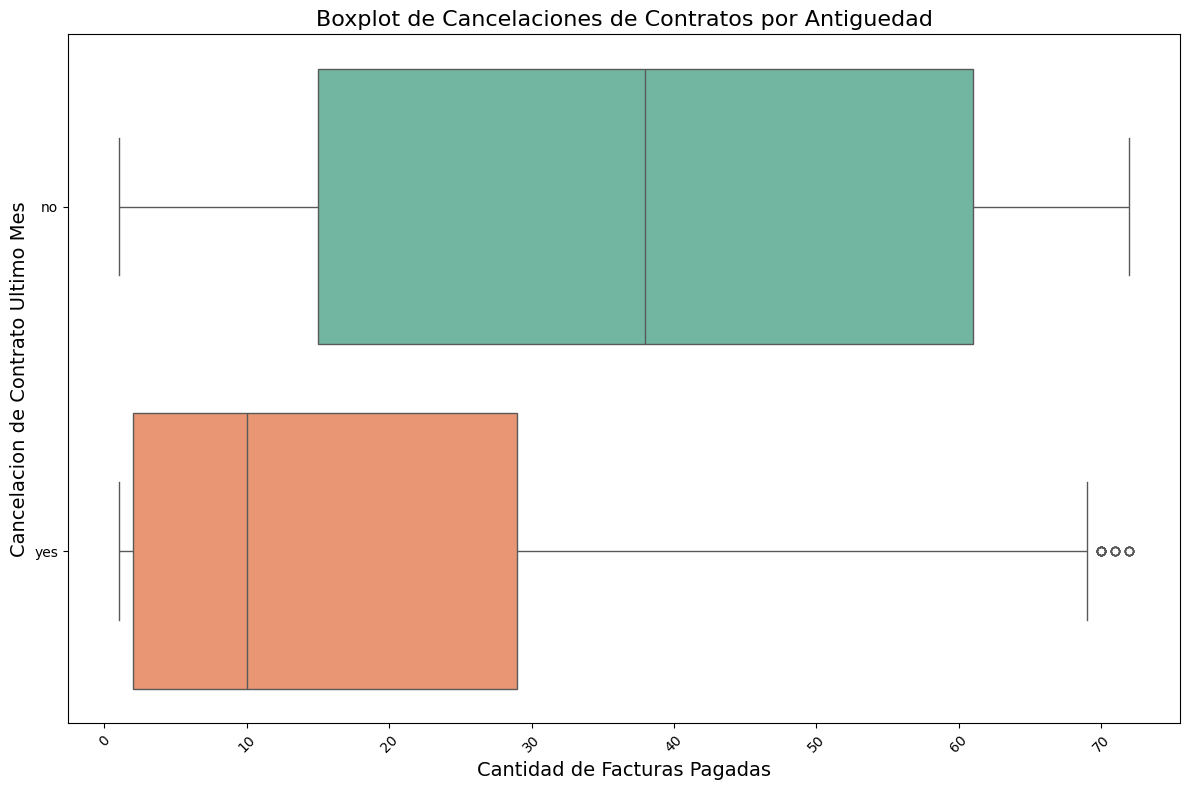

In [106]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_box_genero_contrato_s_n = df[['tenure', 'Churn']].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))
# Crear el boxplot usando seaborn
sns.boxplot(x='tenure', y='Churn', data=df_box_genero_contrato_s_n, palette='Set2')
# Añadir títulos y etiquetas
plt.title('Boxplot de Cancelaciones de Contratos por Antiguedad', fontsize=16)
plt.xlabel('Cantidad de Facturas Pagadas', fontsize=14)
plt.ylabel('Cancelacion de Contrato Ultimo Mes', fontsize=14)
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

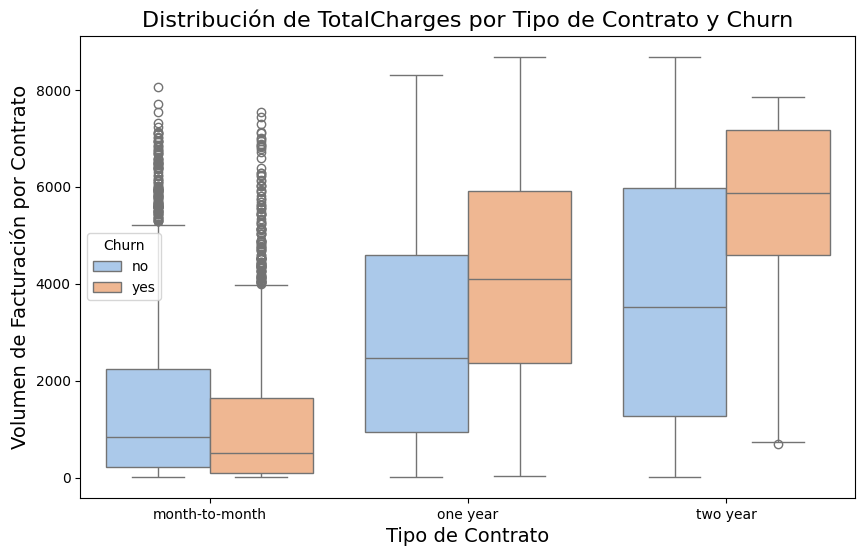

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot de TotalCharges agrupado por 'Contract', diferenciando por 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn', data=df, palette='pastel')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de TotalCharges por Tipo de Contrato y Churn', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Volumen de Facturación por Contrato', fontsize=14)
plt.legend(title='Churn')

# Mostrar el gráfico
plt.show()

Se puede observar que la mayoria de los clientes que han cancelado sus contratos tienen contratos de 1 o 2 años.

Esto coincide con la visualización por cantidad de facturas pagadas, en el primer gráfico de arriba

Observaciones adicionales

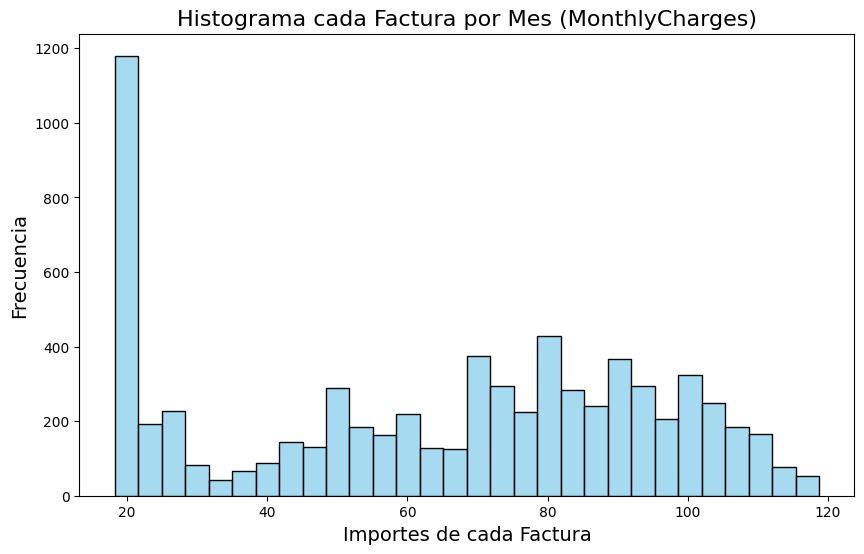

In [53]:
# Filtrar los valores no nulos de 'total_sales'
total_monthly_charges_no_na = df['MonthlyCharges'].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Crear el histograma usando seaborn
sns.histplot(total_monthly_charges_no_na, bins=30, kde=False, color='skyblue')
# Añadir títulos y etiquetas
plt.title('Histograma cada Factura por Mes (MonthlyCharges)', fontsize=16)
plt.xlabel('Importes de cada Factura', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

Al revisar los servicios contratados por cada cliente, la mayoría de los clientes paga maximo 20 dolares.

Luego los que pagan 80 dolares

Aquellos que pagan mas de 100 dolares son mas de 200 clientes.

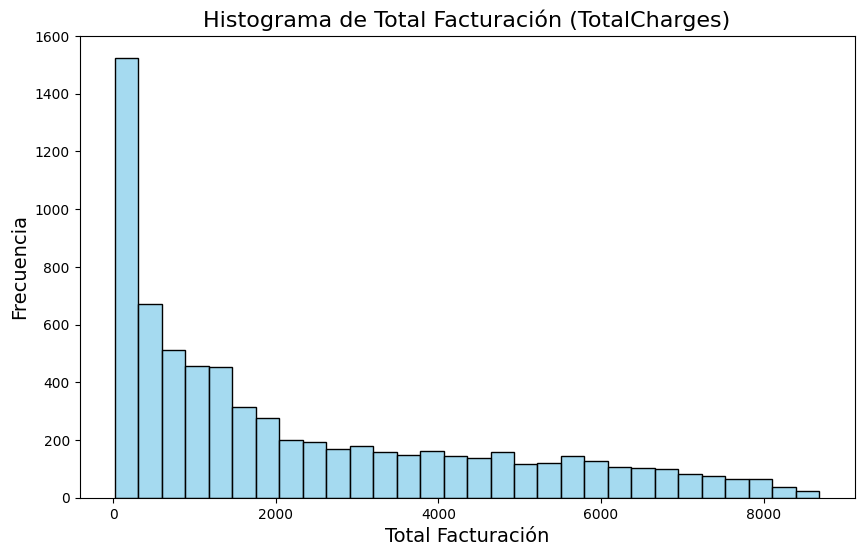

In [51]:
# Filtrar los valores no nulos de 'total_sales'
total_total_charges_no_na = df['TotalCharges'].dropna()
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))
# Crear el histograma usando seaborn
sns.histplot(total_total_charges_no_na, bins=30, kde=False, color='skyblue')
# Añadir títulos y etiquetas
plt.title('Histograma de Total Facturación (TotalCharges)', fontsize=16)
plt.xlabel('Total Facturación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

Al revisar el total de facturación por cada cliente, los clientes que en total pagan menos de 2000 dolares son la gran mayoria.

Viendo un poco mas, los que pagan hasta 330 dolares representan a la gran mayoria.

In [67]:
df.loc[df['TotalCharges'] < 330, 'TotalCharges'].count()

np.int64(1585)

Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [78]:
df[df['Churn'] == 'Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\1999517795.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, y='Churn', data=df, ax=ax_box, palette='pastel')


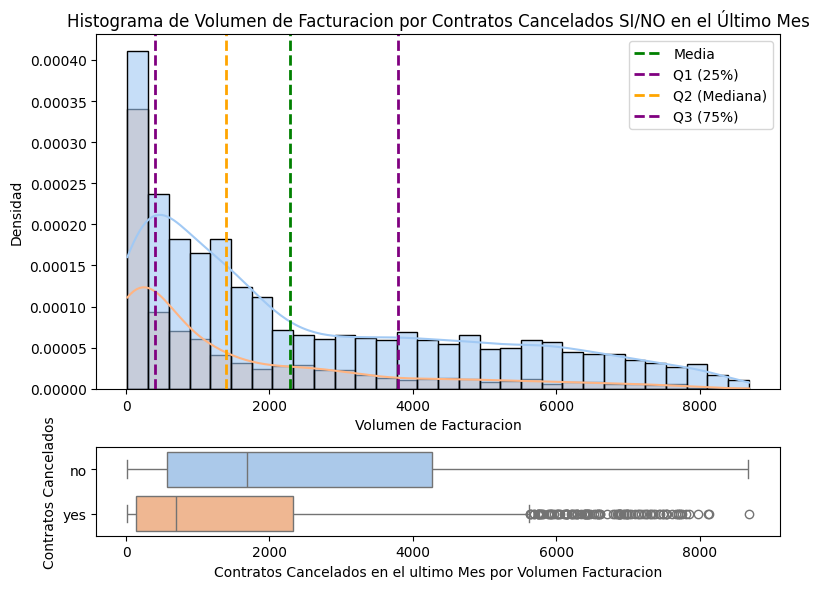

********************************************************************************
Volumen Facturacion de los que cancelaron sus contratos el ultimo Mes
********************************************************************************
El promedio 1531.7960941680042
Primer interquartil 134.5
Mediana 703.55
Tercer interquartil 2331.3
Límite inferior (bigote inferior): -3160.7000000000003
Límite superior (bigote superior): 5626.5
********************************************************************************
Datos de Contratos Vigentes
********************************************************************************
El promedio 1531.7960941680042
Primer interquartil 134.5
Mediana 703.55
Tercer interquartil 2331.3
Límite inferior (bigote inferior): -3160.7000000000003
Límite superior (bigote superior): 5626.5


In [88]:
# Visualización: Histograma y Boxplot de TotalCharges con Churn
import seaborn as sns
import matplotlib.pyplot as plt
from utils import imprimir_bigotes
columna = 'TotalCharges'
# Crear DataFrame para los registros donde Churn es 'Yes'
df_churn_yes = df[df['Churn'] == 'yes']

# Crear DataFrame para los registros donde Churn es 'No'
df_churn_no = df[df['Churn'] == 'no']

# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad, diferenciado por Churn
sns.histplot(data=df, x=columna, hue='Churn', bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
ax_hist.set_title(f'Histograma de Volumen de Facturacion por Contratos Cancelados SI/NO en el Último Mes')
ax_hist.set_xlabel('Volumen de Facturacion')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal, diferenciado por Churn
sns.boxplot(x=columna, y='Churn', data=df, ax=ax_box, palette='pastel')
ax_box.set_ylabel('Contratos Cancelados')
ax_box.set_xlabel('Contratos Cancelados en el ultimo Mes por Volumen Facturacion')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print('*'*80)
print('Volumen Facturacion de los que cancelaron sus contratos el ultimo Mes')
print('*'*80)
print(f'El promedio {df_churn_yes[columna].mean()}')
print(f'Primer interquartil {df_churn_yes[columna].quantile(0.25)}')
print(f'Mediana {df_churn_yes[columna].quantile(0.5)}')
print(f'Tercer interquartil {df_churn_yes[columna].quantile(0.75)}')
imprimir_bigotes(df_churn_yes[columna].dropna())
print('*'*80)
print('Datos de Contratos Vigentes')
print('*'*80)
print(f'El promedio {df_churn_yes[columna].mean()}')
print(f'Primer interquartil {df_churn_yes[columna].quantile(0.25)}')
print(f'Mediana {df_churn_yes[columna].quantile(0.5)}')
print(f'Tercer interquartil {df_churn_yes[columna].quantile(0.75)}')
imprimir_bigotes(df_churn_yes[columna].dropna())


In [76]:
df['Churn'].value_counts()

Churn
no     5163
yes    1869
Name: count, dtype: int64

In [79]:
df['Churn'].value_counts()

Churn
no     5163
yes    1869
Name: count, dtype: int64

En cuanto a los clientes que se fueron en el ultimo mes tienen un promedio de Volumen de Facturación de 1531 dolares.

Hay valores atípicos muy altos que superan los 5626 dolares

C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\1165086158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cantidad_cancelaciones.index, y=cantidad_cancelaciones.values, palette='pastel')


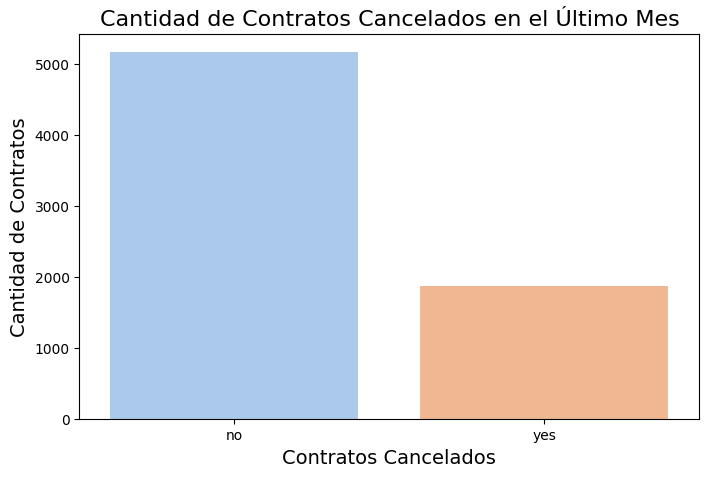

In [91]:
# Visualización: Cantidad de cancelaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Contar el número de cancelaciones
cantidad_cancelaciones = df['Churn'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=cantidad_cancelaciones.index, y=cantidad_cancelaciones.values, palette='pastel')

# Configurar títulos y etiquetas
plt.title('Cantidad de Contratos Cancelados en el Último Mes', fontsize=16)
plt.xlabel('Contratos Cancelados', fontsize=14)
plt.ylabel('Cantidad de Contratos', fontsize=14)

# Mostrar el gráfico
plt.show()


Este mes se cancelaron casi 2 mil contratos.

C:\Users\edgar\AppData\Local\Temp\ipykernel_18236\3740198602.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, y='Churn', data=df, ax=ax_box, palette='pastel')


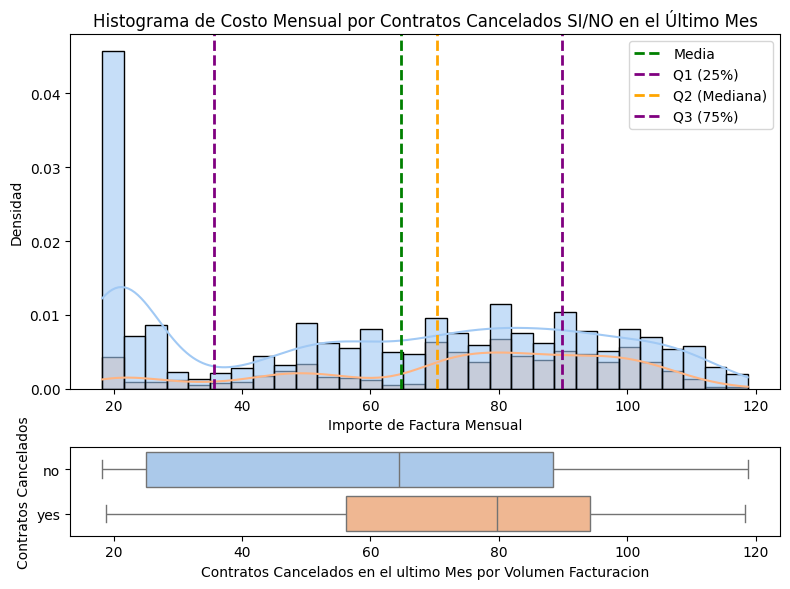

********************************************************************************
Importe de Facturas al mes de los que cancelaron sus contratos el ultimo Mes
********************************************************************************
El promedio 74.44133226324237
Primer interquartil 56.15
Mediana 79.65
Tercer interquartil 94.2
Límite inferior (bigote inferior): -0.9250000000000043
Límite superior (bigote superior): 151.275
********************************************************************************
Datos de Contratos Vigentes
********************************************************************************
El promedio 74.44133226324237
Primer interquartil 56.15
Mediana 79.65
Tercer interquartil 94.2
Límite inferior (bigote inferior): -0.9250000000000043
Límite superior (bigote superior): 151.275


In [93]:
# Visualización: Histograma y Boxplot de MonthlyCharges con Churn
import seaborn as sns
import matplotlib.pyplot as plt
from utils import imprimir_bigotes
columna = 'MonthlyCharges'
# Crear una figura con subplots: uno para el histograma y otro para el boxplot
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad, diferenciado por Churn
sns.histplot(data=df, x=columna, hue='Churn', bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
ax_hist.set_title(f'Histograma de Costo Mensual por Contratos Cancelados SI/NO en el Último Mes')
ax_hist.set_xlabel('Importe de Factura Mensual')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df[columna].mean()
q1 = df[columna].quantile(0.25)
q2 = df[columna].quantile(0.5)  # También es la mediana
q3 = df[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal, diferenciado por Churn
sns.boxplot(x=columna, y='Churn', data=df, ax=ax_box, palette='pastel')
ax_box.set_ylabel('Contratos Cancelados')
ax_box.set_xlabel('Contratos Cancelados en el ultimo Mes por Volumen Facturacion')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print('*'*80)
print('Importe de Facturas al mes de los que cancelaron sus contratos el ultimo Mes')
print('*'*80)
print(f'El promedio {df_churn_yes[columna].mean()}')
print(f'Primer interquartil {df_churn_yes[columna].quantile(0.25)}')
print(f'Mediana {df_churn_yes[columna].quantile(0.5)}')
print(f'Tercer interquartil {df_churn_yes[columna].quantile(0.75)}')
imprimir_bigotes(df_churn_yes[columna].dropna())
print('*'*80)
print('Datos de Contratos Vigentes')
print('*'*80)
print(f'El promedio {df_churn_yes[columna].mean()}')
print(f'Primer interquartil {df_churn_yes[columna].quantile(0.25)}')
print(f'Mediana {df_churn_yes[columna].quantile(0.5)}')
print(f'Tercer interquartil {df_churn_yes[columna].quantile(0.75)}')
imprimir_bigotes(df_churn_yes[columna].dropna())

Se puede apreciar que la mayoría de las personas cancelan sus contratos pagan mensualmente entre 56 y 94 dolares.